In [1]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importando las librerías

In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


## 2. Leyendo los datos

In [3]:
dataset = pd.read_csv('..\..\datos_procesados\datos_procesados_sin_outliers.csv')
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67690,21074,1,165,80.0,150,80,1,1,0,0,1,1
67691,19240,2,168,76.0,120,80,1,1,1,0,1,0
67692,19066,2,183,105.0,180,90,3,1,0,1,0,1
67693,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 3. Separando los datos en las variables predictoras (**X**) y la variable a predecir (y)

In [4]:
X = dataset.drop(columns=['cardio'], axis=1)
y = dataset['cardio']

## 4. Escalando los datos

In [5]:
rob_esc = RobustScaler()
X_esc = rob_esc.fit_transform(X=X)

## 5. Separando los datos en train y test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.3, random_state=42)

## 6. Creando el clasificador

In [7]:
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train)

LGBMClassifier()

## 7. Verificando la precisión del modelo con los datos de entrenamiento

Presición del modelo con los datos entrenamiento: 75.09 %


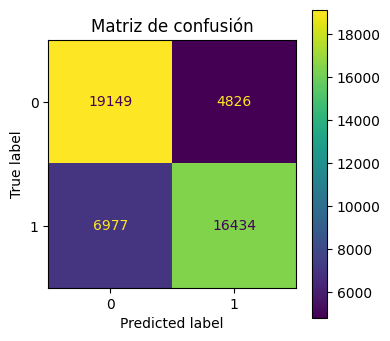

In [8]:
y_pred = clf.predict(X=X_train)
print('Presición del modelo con los datos entrenamiento: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

## 8. Verificando las predicciones con los datos de prueba

Presición del modelo con los datos de prueba: 73.65 %


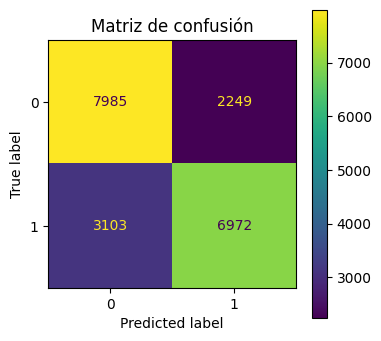

In [9]:
y_pred = clf.predict(X=X_test)
print('Presición del modelo con los datos de prueba: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()